In [3]:
import csv

data1 = open("ratedData/random_evals.csv", 'r', encoding='utf-8')
next(data1)
data2 = open("ratedData/chessData.csv", 'r', encoding='utf-8')
next(data2)
datas = [data1, data2]

def formatData(data):
    for row in data:
        x_raw, y_raw = row.split(',')[0].split(' ')[0], row.split(',')[1]
        if y_raw[0] == "#":
            continue
        try:
            y_raw = int(y_raw)
        except:
            continue
        x_raw
        for i in range(1,9):
            x_raw = x_raw.replace(str(i), "x"*i)
        x_raw = x_raw.replace('/', '')
        yield x_raw, y_raw


In [20]:
from enum import Enum
Values = {'p': -1,'P': 1,'n': -3,'N': 3,'b': -3,'B': 3,'r': -5,'R': 5,'q': -9,'Q': 9,'k': -10,'K': 10} # The value of each piece
Pieces = {'p' : "pawn", 'n' : "knight", 'b': "bishop", 'r': "rook", 'q': "queen", 'k': "king"}
Weights = {
    'p': [1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1],
    'P': [1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1],
    'n': [1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1],
    'N': [1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1],
    'b': [1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1],
    'B': [1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1],
    'r': [1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1],
    'R': [1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1],
    'q': [1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1],
    'Q': [1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1],
    'k': [1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1],
    'K': [1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1],
}
learning_rate = 1e-3


In [21]:
for i in range(6):
    data1 = open("ratedData/random_evals.csv", 'r', encoding='utf-8')
    next(data1)
    data2 = open("ratedData/chessData.csv", 'r', encoding='utf-8')
    next(data2)
    datas = [data1, data2]
    learning_rate = learning_rate / 2
    for data in datas:
        for x, y in formatData(data):
            y_pred = 0
            # Inference
            for position, piece in enumerate(x):
                if(piece == 'x'):
                    continue
                y_pred = y_pred + Weights[piece][position]*Values[piece]
            y_diff = int(y) - y_pred
            # Simple back-propagation
            for position, piece in enumerate(x):
                if(piece == 'x'):
                    continue
                Weights[piece][position] = Weights[piece][position] + y_diff*learning_rate/Values[piece]



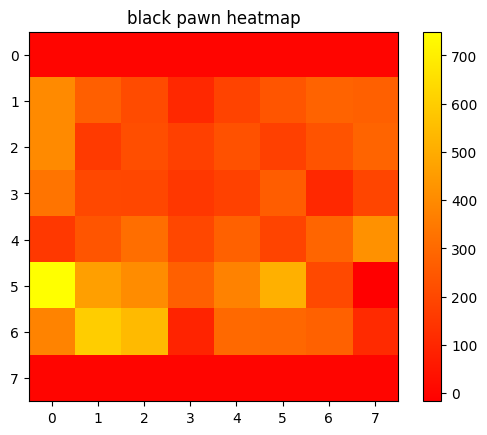

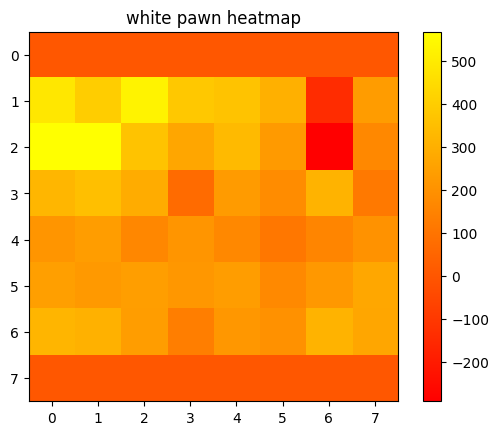

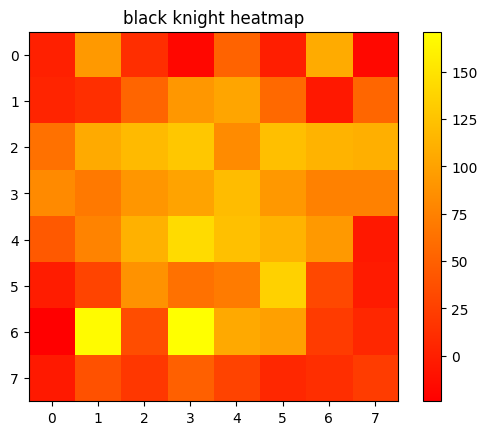

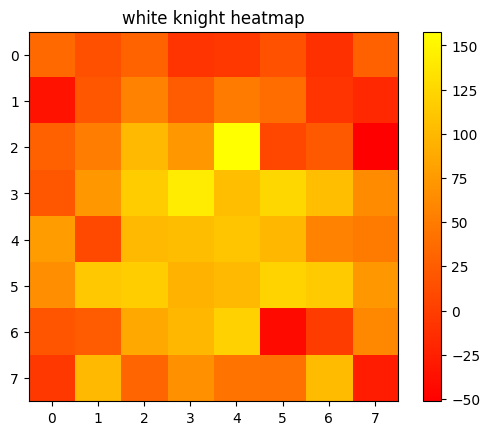

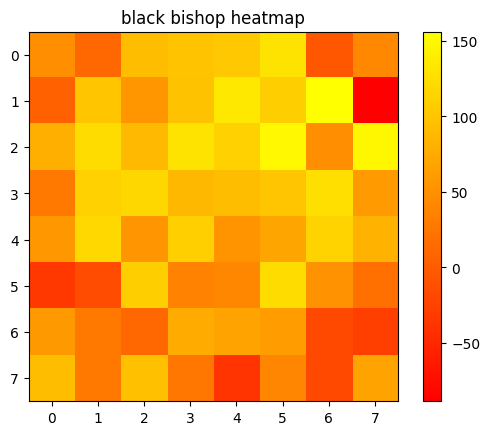

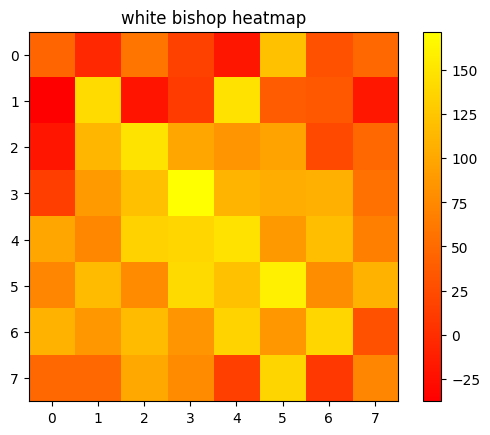

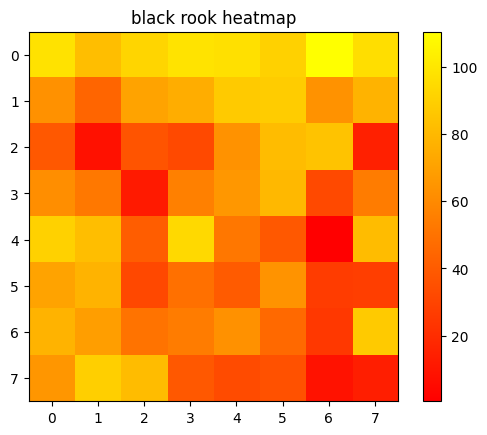

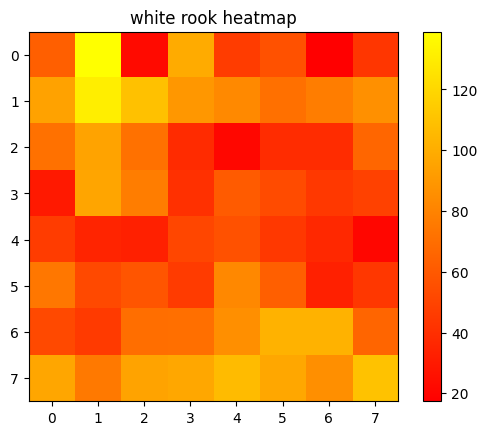

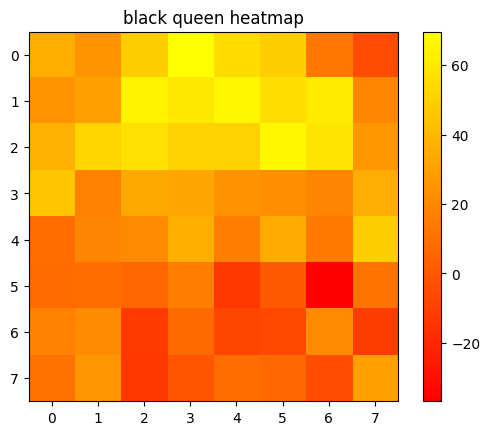

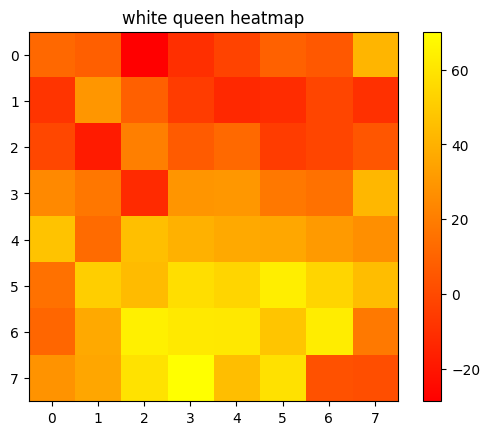

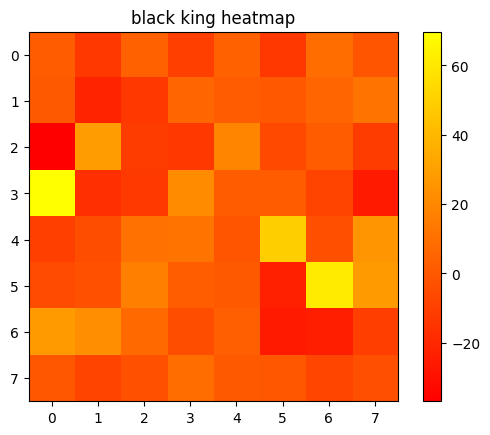

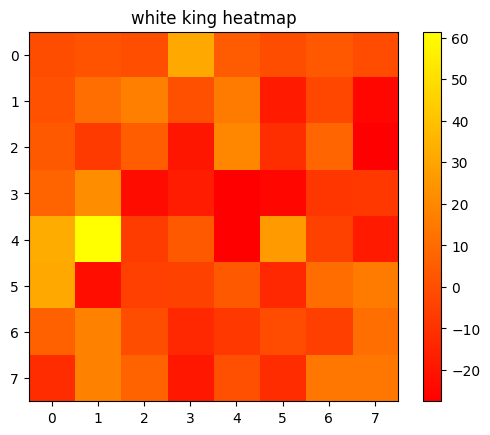

<Figure size 640x480 with 0 Axes>

In [23]:
import matplotlib.pyplot as plt
import numpy as np

for piece, weights in Weights.items():
    w = np.array([weights]).reshape(8,8)
    p = Pieces[piece.lower()]
    color = "black" if piece.islower() else "white" 
    plt.imshow(w, cmap='autumn')
    plt.colorbar()
    plt.title(f"{color} {p} heatmap")
    plt.show()
    plt.savefig(f"{color}-{p}-heatmap.png")
